In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm


# Filter out FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Filter out FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('../unseen_species_model/results/estimations.csv')
df = df[df['decade']<=1800]
df = df.rename(columns = {'decade':'year', 'region':'region_name'})


print(list(set(df.region_name)))

['United Kingdom', 'Nordic countries', 'Indian world', 'Low countries', 'German world', 'Slav world', 'Korea', 'Spain', 'Greek World', 'France', 'Latin World', 'Arabic world', 'Italy', 'Balkans', 'Japan', 'Portugal', 'Eastern Europe', 'Central Europe', 'Persian world', 'Chinese world']


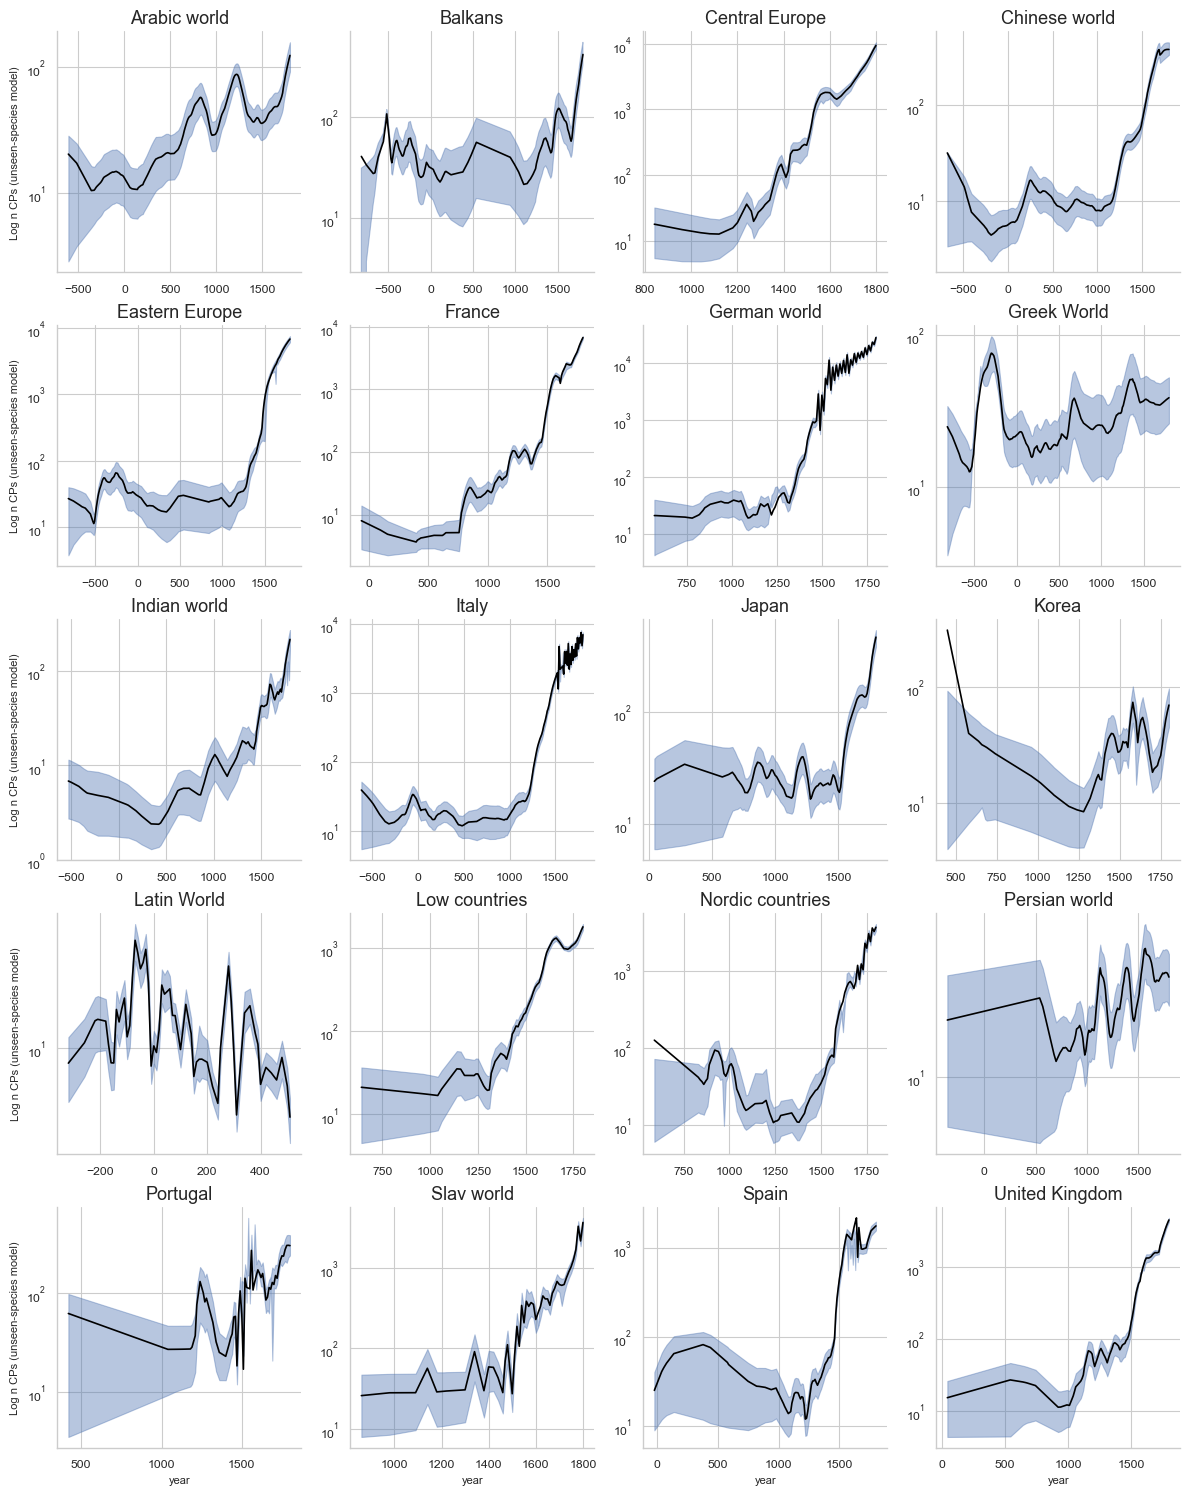

In [2]:


# Custom function for plotting
def lowess_fill_plot(x, y, lower, upper, color, **kwargs):
    ax = plt.gca()  # Get current axis
    ax.set_yscale('log')

    # LOWESS regression
    lowess_results = sm.nonparametric.lowess(y, x, frac=lowess_span)
    ax.plot(x, lowess_results[:, 1], color='black', label='LOWESS')

    # Calculating LOWESS for lower and upper bounds
    lowess_lower = sm.nonparametric.lowess(lower, x, frac=lowess_span)
    lowess_upper = sm.nonparametric.lowess(upper, x, frac=lowess_span)

    # Filling between lower and upper LOWESS bounds
    ax.fill_between(x, lowess_lower[:, 1], lowess_upper[:, 1], alpha=0.4, color=color)

    ax.legend()


sns.set(style="whitegrid", context="paper", rc={"font.size": 10, "axes.titlesize": 10, "axes.labelsize": 8})

# Adjust the lowess_span as per your requirement
lowess_span = 0.1

# Create a facet plot with one plot per region
g = sns.FacetGrid(df, col="region_name", col_wrap=4, height=3, sharex=False, sharey=False)

# Use the custom function for plotting
g = g.map(lowess_fill_plot, "year", "N_est", "lower", "upper", color='b')

# Find the global minimum and maximum year
global_min_year = df["year"].min()
global_max_year = df["year"].max()

"""# Adjust the x-axis scale for each plot
for ax in g.axes:
    ax.set_xlim(global_min_year, global_max_year)"""

# Set titles and y-labels
g.set_titles("{col_name}", size=13)
g.set_ylabels("Log n CPs (unseen-species model)")

plt.savefig("figures/unseen_species_model/facet_plot_regions.png", dpi=300)
# Show the plot
plt.show()


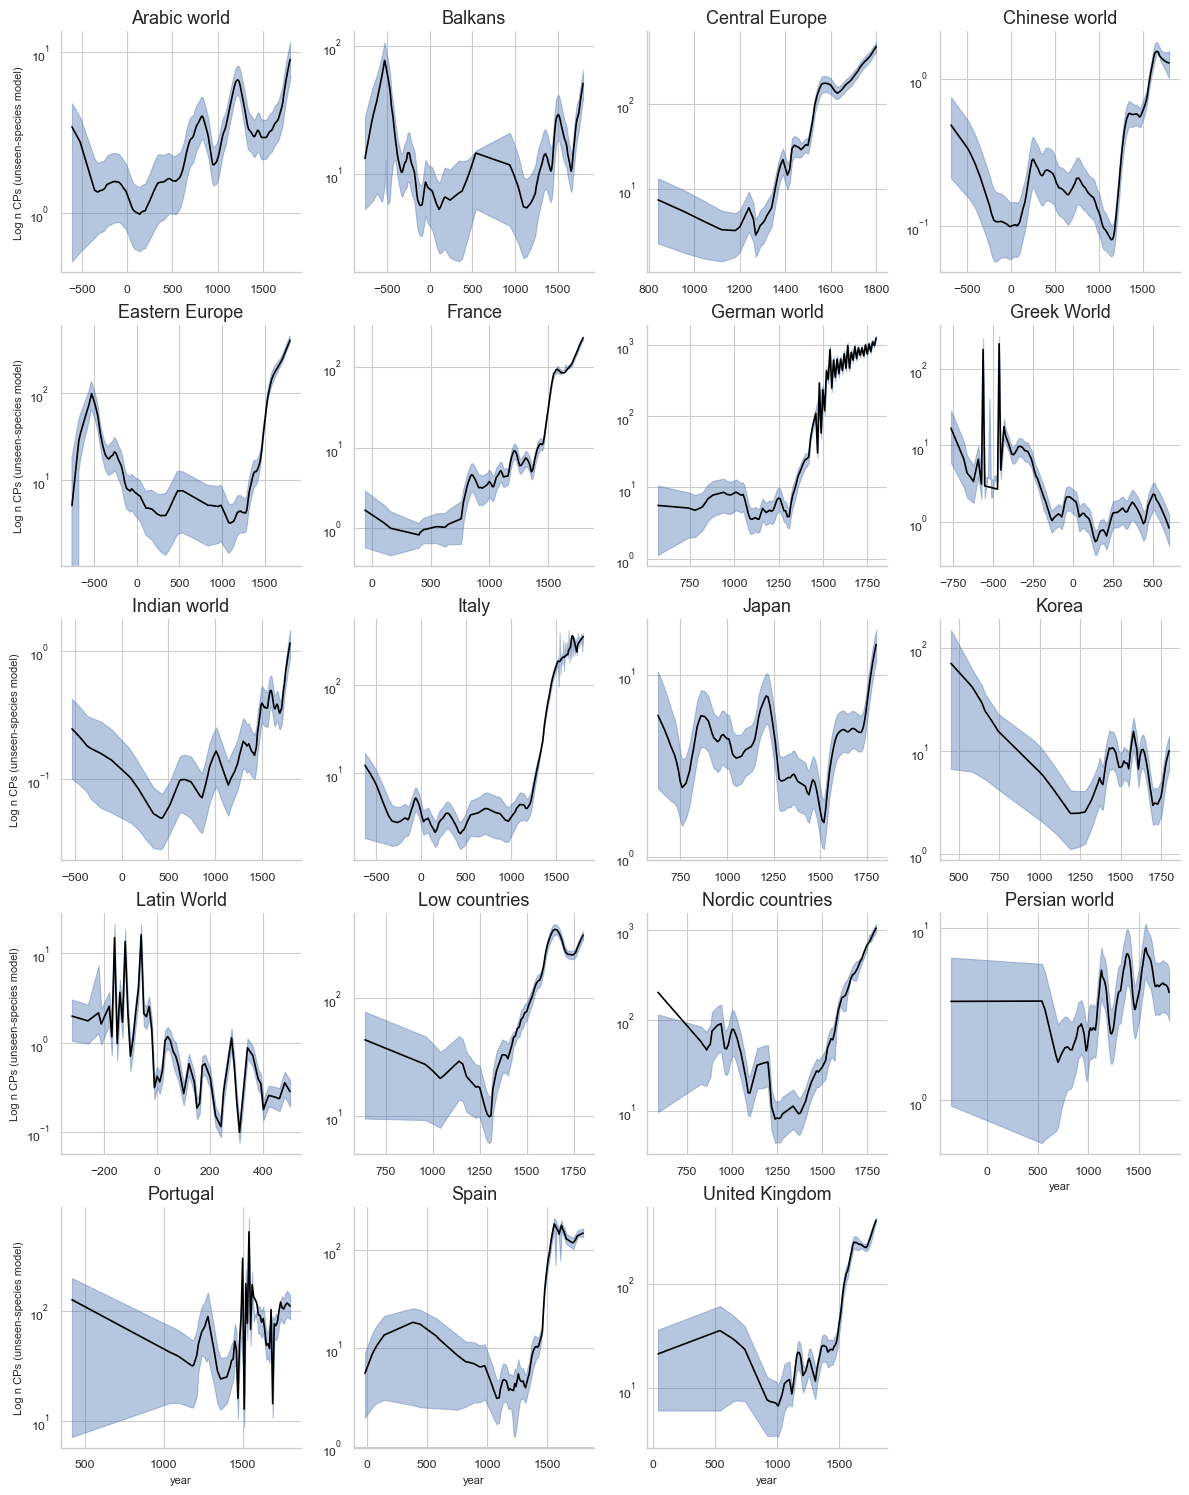

In [15]:
df_population = pd.read_csv('../environnement_data/population_region_name.csv', index_col=[0])
df_merged = pd.merge(df_population, df, on = ['year', 'region_name'])
df_merged['N_est'] = df_merged['N_est']/df_merged['population']
df_merged['lower'] = df_merged['lower']/df_merged['population']
df_merged['upper'] = df_merged['upper']/df_merged['population']

sns.set(style="whitegrid", context="paper", rc={"font.size": 10, "axes.titlesize": 10, "axes.labelsize": 8})

# Adjust the lowess_span as per your requirement
lowess_span = 0.1

# Create a facet plot with one plot per region
g = sns.FacetGrid(df_merged, col="region_name", col_wrap=4, height=3, sharex=False, sharey=False)

# Use the custom function for plotting
g = g.map(lowess_fill_plot, "year", "N_est", "lower", "upper", color='b')

# Find the global minimum and maximum year
global_min_year = df_merged["year"].min()
global_max_year = df_merged["year"].max()

"""# Adjust the x-axis scale for each plot
for ax in g.axes:
    ax.set_xlim(global_min_year, global_max_year)"""

# Set titles and y-labels
g.set_titles("{col_name}", size=13)
g.set_ylabels("Log n CPs (unseen-species model) per capita")

plt.savefig("figures/unseen_species_model/facet_plot_regions_per_capita.png", dpi=300)


,region_code,year,population,region_name,N_est,lower,upper
0,re_arabic_world,-610,6.08375,Arabic world,4.346823,0.503817,5.747652
1,re_arabic_world,-520,6.45500,Arabic world,1.579531,0.533195,2.735544
2,re_arabic_world,-360,7.31500,Arabic world,2.536900,1.354282,3.881423
3,re_arabic_world,-330,7.58875,Arabic world,0.786357,0.423154,1.212728
4,re_arabic_world,-320,7.68000,Arabic world,0.770094,0.418027,1.189175
...,...,...,...,...,...,...,...
1878,re_united_kingdom,1760,7.95000,United Kingdom,363.919960,337.670850,391.222611
1879,re_united_kingdom,1770,8.65000,United Kingdom,296.506123,275.932630,318.245842
1880,re_united_kingdom,1780,9.35000,United Kingdom,425.571981,396.988618,455.622837
1881,re_united_kingdom,1790,10.05000,United Kingdom,312.992824,292.849036,334.190322


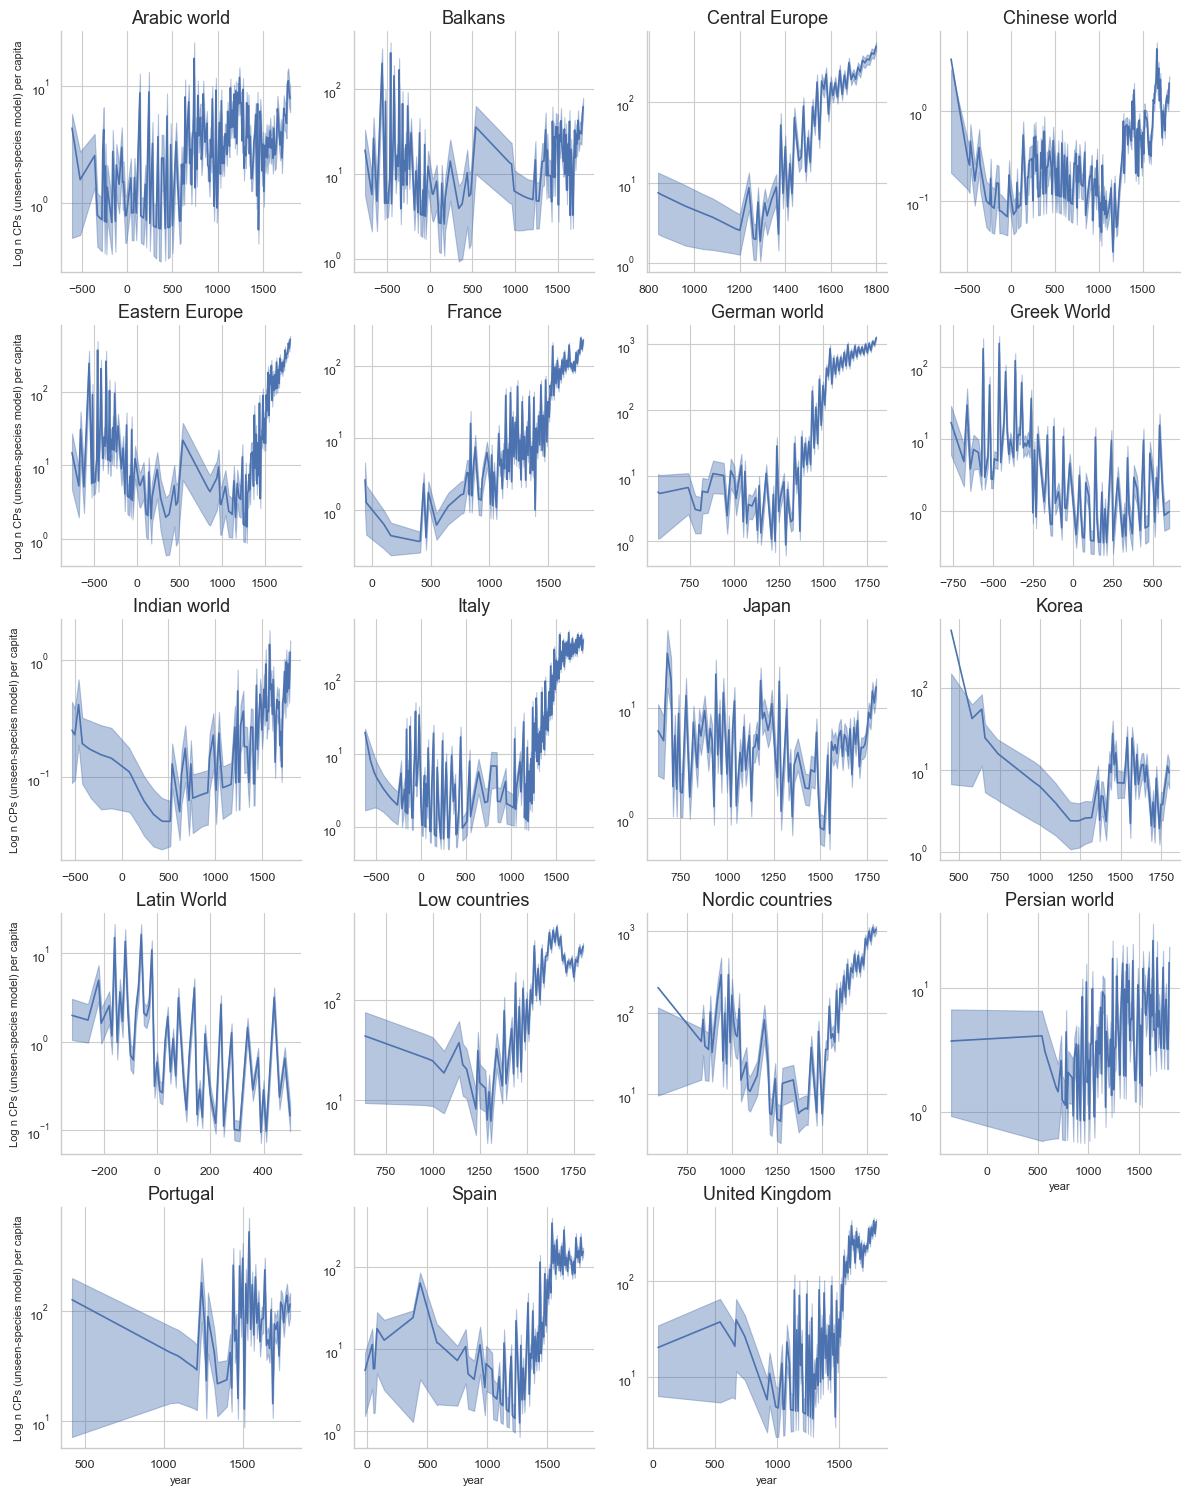

In [16]:

# Custom function for plotting with filling between lower and upper bounds
def fill_plot(x, y, lower, upper, color, **kwargs):
    ax = plt.gca()  # Get current axis
    ax.set_yscale('log') # 10 base

    # Plot the original line
    ax.plot(x, y, color=color, label='Line')

    # Filling between lower and upper bounds
    ax.fill_between(x, lower, upper, alpha=0.4, color=color)

    ax.legend()

sns.set(style="whitegrid", context="paper", rc={"font.size": 10, "axes.titlesize": 10, "axes.labelsize": 8})

# Adjust the lowess_span as per your requirement

# Create a facet plot with one plot per region
g = sns.FacetGrid(df_merged, col="region_name", col_wrap=4, height=3, sharex=False, sharey=False)

# Use the custom function for plotting
#g = g.map(lowess_fill_plot, "year", "N_est", "lower", "upper", color='b')

g = g.map(fill_plot, "year", "N_est", "lower", "upper", color='b')

# Find the global minimum and maximum year
global_min_year = df_merged["year"].min()
global_max_year = df_merged["year"].max()

"""# Adjust the x-axis scale for each plot
for ax in g.axes:
    ax.set_xlim(global_min_year, global_max_year)"""

# Set titles and y-labels
g.set_titles("{col_name}", size=13)
g.set_ylabels("Log n CPs (unseen-species model) per capita")

plt.savefig("figures/unseen_species_model/facet_plot_regions_per_capita_non_lowess.png", dpi=300)

